In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def interpNrecursive(x,y):
    c = np.empty(x.size)
    c[0] = y[0]
    if x.size>1:
        c[1:] = interpNrecursive(x[1:],(y[1:]-y[0])/(x[1:]-x[0]))
    return c

In [3]:
def hornerN(t,x,c):
    result = c[-1]
    for xk,ck in zip(x[-2::-1],c[-2::-1]):
        result = result*(t-xk)+ck
    return result

In [4]:
#eps = 1e-4
eps = 0
def f(x):
    return np.sin(10*x)*np.exp(-2*x) + eps*np.random.randn(x.size)

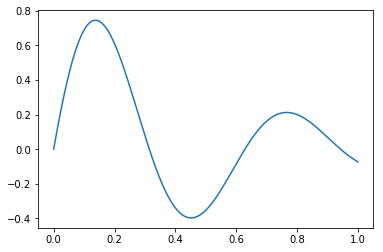

In [5]:
t = np.linspace(0,1,1000)
plt.plot(t,f(t))

In [6]:
x = np.random.rand(10)

(-0.5, 0.8)

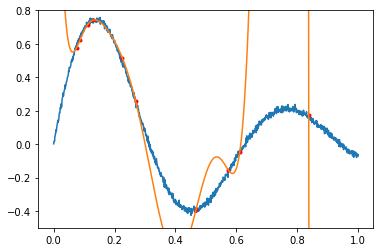

In [7]:
eps = 1e-2
y = f(x)
c = interpNrecursive(x,y)
plt.plot(t,f(t),x,y,'r.',t,hornerN(t,x,c))
plt.ylim([-0.5,0.8])

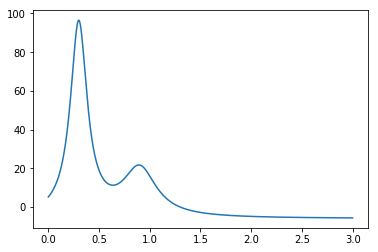

In [8]:
def humps(x):
    return 1/((x-.3)**2+0.01) + 1./((x-0.9)**2 +0.04) - 6
t = np.linspace(0,3,1000)
plt.plot(t,humps(t))

In [9]:
x = 3*np.random.rand(25)
x = np.hstack((0,x,3))
x

array([0.        , 2.68231605, 0.03342072, 0.39435112, 2.69379244,
       0.77430529, 2.80073745, 2.90472246, 2.75779789, 1.12788297,
       0.81426095, 1.32589599, 1.29432311, 0.48290603, 2.85871081,
       2.8484701 , 2.26868505, 0.1087548 , 1.63010206, 2.77614505,
       1.74236566, 1.68373178, 2.30632243, 0.63905859, 0.41882569,
       0.68329237, 3.        ])

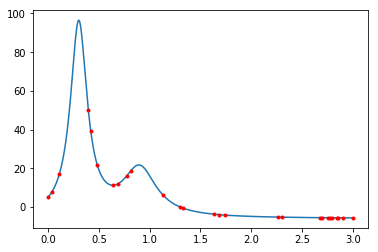

In [10]:
y = humps(x)
plt.plot(t,humps(t),x,y,'r.')

(-10, 100)

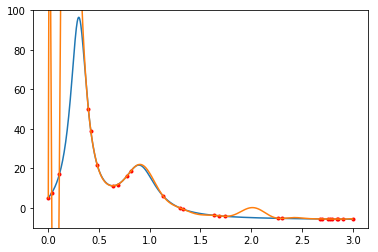

In [11]:
c = interpNrecursive(x,y)
plt.plot(t,humps(t),x,y,'r.',t,hornerN(t,x,c))
plt.ylim([-10,100])

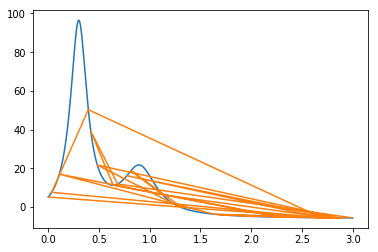

In [12]:
plt.plot(t,humps(t),x,y)

In [13]:
x.sort()
x
y = humps(x)

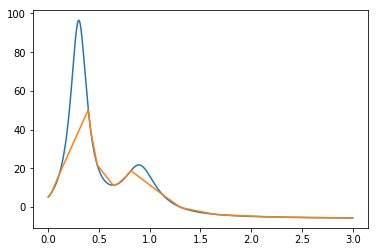

In [14]:
plt.plot(t,humps(t),x,y)

In [15]:
def pwLinter(x,y):
    a = y[:-1]
    dx = np.diff(x)
    dy = np.diff(y)
    b = dy/dx
    return(a,b)

In [16]:
def locate(t,x,g=0):
    if x[g]<=t and t<=x[g+1]:
        return g
    left = 0
    right = len(x)-1
    while right>left+1:
        mid = (right+left)//2
        if t >= x[mid]:
            left = mid
        else:
            right = mid
    return left

In [17]:
locate(2.4,x,0)

17

In [18]:
x[21],x[22]

(2.776145046274383, 2.800737445791823)

In [19]:
def pwLeval(t,x,c):
    a,b = c
    i = locate(t,x)
    return a[i]+b[i]*(t-x[i])

In [20]:
c = pwLinter(x,y)
pwLeval(t,x,c)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()